# Multiclass classifier

Classify articles from a Reuters dataset having 46 different categories

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, losses, optimizers, metrics
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [3]:
reuters

<module 'tensorflow.keras.datasets.reuters' from 'C:\\Users\\90545\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\datasets\\reuters\\__init__.py'>

In [4]:
LIMIT_WORD = 40000

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

C:\Users\90545\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\90545\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
train_data

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [7]:
test_data

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192, 510, 17, 12]),
       list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 13086, 265, 27151, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4,

In [8]:
train_data.shape

(8982,)

#### Pre-process the data (convert sequences into tensors)

In [9]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
x_train[1]

array([0., 1., 0., ..., 0., 0., 0.])

#### One-hot encoding of labels (categorical encoding)

In [13]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [14]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building the network

#### Architecture

- 2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
- 1 output layer (with sigmoid activation function)

In [17]:
model = models.Sequential()

In [18]:
model.add(layers.Dense(64, activation = "relu", input_shape = (LIMIT_WORD, )))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

In [19]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
              loss = losses.categorical_crossentropy, 
              metrics = metrics.categorical_accuracy)

In [20]:
x_train.shape

(8982, 40000)

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs = 30, 
                   batch_size = 512, 
                   validation_data = (x_val, y_val))

Epoch 1/30
16/16 [==============================] - 17s 652ms/step - loss: 3.1534 - categorical_accuracy: 0.3328 - val_loss: 1.8051 - val_categorical_accuracy: 0.6370
Epoch 2/30
16/16 [==============================] - 6s 394ms/step - loss: 1.5530 - categorical_accuracy: 0.6879 - val_loss: 1.3161 - val_categorical_accuracy: 0.7130
Epoch 3/30
16/16 [==============================] - 6s 401ms/step - loss: 1.0619 - categorical_accuracy: 0.7794 - val_loss: 1.1362 - val_categorical_accuracy: 0.7470
Epoch 4/30
16/16 [==============================] - 6s 357ms/step - loss: 0.8035 - categorical_accuracy: 0.8330 - val_loss: 1.0201 - val_categorical_accuracy: 0.7810
Epoch 5/30
16/16 [==============================] - 6s 373ms/step - loss: 0.6009 - categorical_accuracy: 0.8786 - val_loss: 0.9642 - val_categorical_accuracy: 0.7930
Epoch 6/30
16/16 [==============================] - 6s 343ms/step - loss: 0.4766 - categorical_accuracy: 0.9089 - val_loss: 0.9105 - val_categorical_accuracy: 0.8020
Epo

### PLOT RESULTS

#### Traning and Validation Loss

In [23]:
history_dict = history.history

In [24]:
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

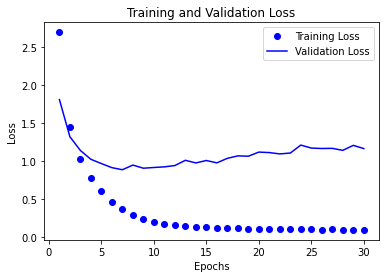

In [25]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

acc = history_dict["categorical_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Training and Validation Accuracy

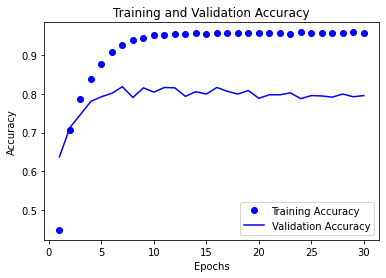

In [26]:
history_dict = history.history
acc = history_dict["categorical_accuracy"]
val_acc = history_dict["val_categorical_accuracy"]

acc = history_dict["categorical_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
model.fit(x_train, 
         y_train, 
         epochs = 11, 
         batch_size = 512, 
         validation_data = (x_test, y_test))

Epoch 1/11
18/18 [==============================] - 13s 517ms/step - loss: 0.2028 - categorical_accuracy: 0.9418 - val_loss: 1.3115 - val_categorical_accuracy: 0.7903
Epoch 2/11
18/18 [==============================] - 7s 384ms/step - loss: 0.1516 - categorical_accuracy: 0.9495 - val_loss: 1.3025 - val_categorical_accuracy: 0.7827
Epoch 3/11
18/18 [==============================] - 13s 755ms/step - loss: 0.1314 - categorical_accuracy: 0.9520 - val_loss: 1.3001 - val_categorical_accuracy: 0.7827
Epoch 4/11
18/18 [==============================] - 11s 591ms/step - loss: 0.1184 - categorical_accuracy: 0.9548 - val_loss: 1.3002 - val_categorical_accuracy: 0.7881
Epoch 5/11
18/18 [==============================] - 12s 651ms/step - loss: 0.1110 - categorical_accuracy: 0.9546 - val_loss: 1.2942 - val_categorical_accuracy: 0.7872
Epoch 6/11
18/18 [==============================] - 8s 440ms/step - loss: 0.1071 - categorical_accuracy: 0.9562 - val_loss: 1.3460 - val_categorical_accuracy: 0.7850


In [28]:
test_lose, test_acc = model.evaluate(x_test, y_test)

71/71 [==============================] - 2s 21ms/step - loss: 1.4427 - categorical_accuracy: 0.7774


In [29]:
print("test_acc: ", test_acc * 100)

test_acc:  77.73820161819458
